****Detecting if pearson have heart failure or he is noraml using ECG images *****

this data set contain 4 classes 
1)Myocardial infarction (MI)
2)History of Myocardial Infarction (HMI)
3)Abnormal Heart Beats (AHB)
4)Noraml Heart Beats (NHB)

In [1]:

import os
for dirname, _, filenames in os.walk('D:\Model-heart-disease\ECG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(1).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(10).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(100).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(101).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(102).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(103).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(104).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(105).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(106).jpg
D:\Model-heart-disease\ECG\ECG Images of Myocardial Infarction Patients (240x12=2880)\MI(107).jpg
D:\Model-heart-disease\

In [2]:
#import needed libirares 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
from tensorflow.keras.utils import load_img,img_to_array

In [4]:
#read training data
np.random.seed(1234)
path='train'
img_list=os.listdir(path)
lables=[i for i in range(len(img_list))]
label_dict=dict()
label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
label_dict['Normal Person ECG Images (284x12=3408)']= 3
data=[]
label=[]
C=0
for cat in img_list:
    C=0
    pic_list=os.path.join(path,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        #print(image)
        image=cv2.imread(image)
        #image=procssing(image) 
        #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        #image=img_to_array(image)
        data.append(image)
        label.append(label_dict[cat])
        C+=1
    print(C)

239
233
172
284


C:\Users\Admin\AppData\Local\Temp\ipykernel_12528\3230877531.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


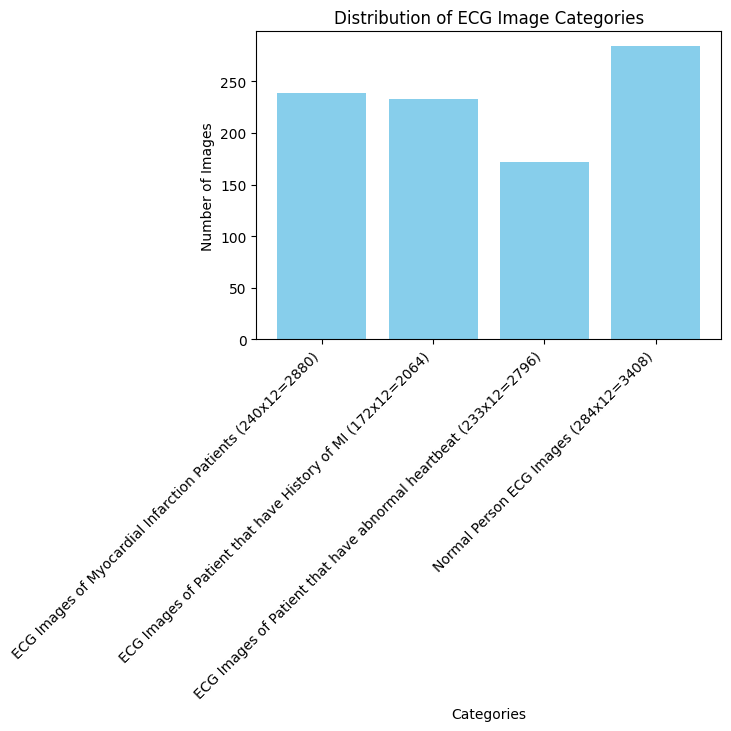

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Đường dẫn đến thư mục chứa dữ liệu
path = 'train'

# Danh sách các tên thư mục (có thể là các nhãn của dữ liệu)
img_list = os.listdir(path)

# Khởi tạo từ điển để ánh xạ tên thư mục sang nhãn
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []
categories_count = []

for category in img_list:
    category_path = os.path.join(path, category)
    if os.path.isdir(category_path):
        image_count = 0
        for img_file in os.listdir(category_path):
            image_path = os.path.join(category_path, img_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            data.append(image)
            label.append(label_dict[category])
            image_count += 1
        categories_count.append(image_count)

# Thay đổi nhãn thành các số 0, 1, 2 và 3
label = np.array(label)

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
plt.bar(label_dict.keys(), categories_count, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of ECG Image Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


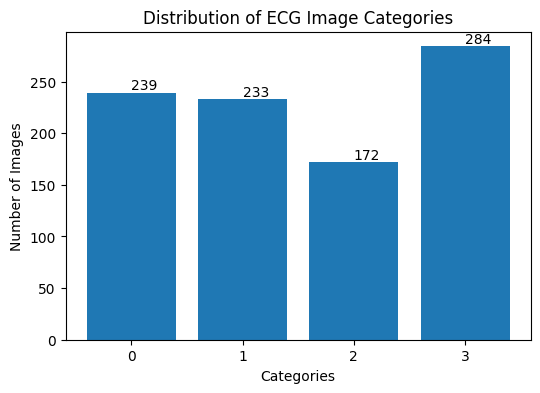

In [6]:
import matplotlib.pyplot as plt

# Tạo một số dữ liệu giả định để minh họa
label = {'0': 239, '1': 233, '2': 172, '3': 284}
categories_count = [239, 233, 172, 284]  # Đây là dữ liệu thô, không phải keys

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
bars = plt.bar(label.keys(), categories_count, color='#1F78B4')  # Sử dụng label.keys() để lấy nhãn

# Thêm số lượng lên từng cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of ECG Image Categories')
plt.show()


In [7]:
data=np.array(data)
data.shape

(928, 224, 224, 3)

In [8]:
label=np.array(label)
label.shape

()

In [9]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3

In [10]:
from tensorflow.keras.utils import to_categorical

num_classes = 5
label = to_categorical(label, num_classes)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'dict'

In [ ]:
# Xây dựng mô hình 2DCNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')

])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(data, label, batch_size=1, epochs=100, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/ancao/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (1, 5, 5, 5) and (1, 5) are incompatible


In [ ]:
np.random.seed(1234)
path_test='test'
img_list_test=os.listdir(path_test)
lables=[i for i in range(len(img_list_test))]
label_dict=dict()
label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
label_dict['Normal Person ECG Images (284x12=3408)']= 3
data_test=[]
label_test=[]
C=0
for cat in img_list_test:
    C=0
    pic_list=os.path.join(path_test,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        #print(image)
        image=cv2.imread(image)
        #image=procssing(image) 
        #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        #image=img_to_array(image)
        data_test.append(image)
        label_test.append(label_dict[cat])
        C+=1
    print(C)

112
112
112
112


In [ ]:
data_test=np.array(data_test)
data_test.shape

(448, 224, 224, 3)

In [ ]:
label_test=np.array(label_test)
label_test.shape

(448,)

In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes = 5
label_test = to_categorical(label_test, num_classes)
label_test.shape

(448, 5)

In [ ]:
_, acc = model.evaluate(data_test, label_test)

14/14 [==============================] - 31s 2s/step - loss: 0.5486 - accuracy: 0.8996


In [ ]:
y_pred=model.predict(data_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Assuming data_test and label_test are correctly prepared and 'model' is already trained

from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report

# Convert one-hot encoded test labels back to class indices for comparison
label_test_indices = np.argmax(label_test, axis=1)

# Evaluate the model on the test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)  # added verbose=0 to reduce log clutter
print(f"Test Accuracy: {acc*100:.2f}%")

# Predict classes with the model
y_pred_prob = model.predict(data_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a classification report
report = classification_report(label_test_indices, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


Test Accuracy: 89.96%
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)    0.98246   1.00000   0.99115       112
     ECG Images of Patient that have History of MI (172x12=2064)    0.80000   1.00000   0.88889       112
ECG Images of Patient that have abnormal heartbeat (233x12=2796)    0.88189   1.00000   0.93724       112
                          Normal Person ECG Images (284x12=3408)    1.00000   0.59821   0.74860       112

                                                        accuracy                        0.89955       448
                                                       macro avg    0.91609   0.89955   0.89147       448
                                                    weighted avg    0.91609   0.89955   0.89147       448



In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.metrics import roc_auc_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data loading and preprocessing is done here, resulting in data, label arrays

# Convert labels to categorical (one-hot encoding)
label = to_categorical(label)

# Setup 10-fold stratified cross-validation
kfolds = 10
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=1234)

# Prepare to collect metrics
metrics = {'AUC': [], 'ACC': [], 'MCC': [], 'Std': [], 'Confusion_Matrix': []}

for train, test in kfold.split(data, np.argmax(label, axis=1)):
    # Build the model (same as before)
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model on the fold
    history = model.fit(data[train], label[train], epochs=100, batch_size=16, verbose=0)

    # Evaluate the model on the fold's test set
    predictions = model.predict(data[test])
    y_true = np.argmax(label[test], axis=1)
    y_pred = np.argmax(predictions, axis=1)
    
    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(to_categorical(y_true), predictions, multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    # Store metrics
    metrics['AUC'].append(auc)
    metrics['ACC'].append(acc)
    metrics['MCC'].append(mcc)
    metrics['Confusion_Matrix'].append(cm)

# Calculate means (and other statistics, as needed) of metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
std_metrics = {metric: np.std(values) for metric, values in metrics.items()}

# Save results to a .txt file
with open('model_evaluation.txt', 'w') as f:
    for metric, values in metrics.items():
        f.write(f"{metric} per fold: {values}\n")
    f.write("\nAverage metrics:\n")
    for metric, value in avg_metrics.items():
        f.write(f"{metric}: {value}\n")
    for metric, value in std_metrics.items():
        f.write(f"{metric} Std: {value}\n")

# Note: Adjust the paths, data loading, and label preparation as needed


In [ ]:
model.save("MOI.h5")

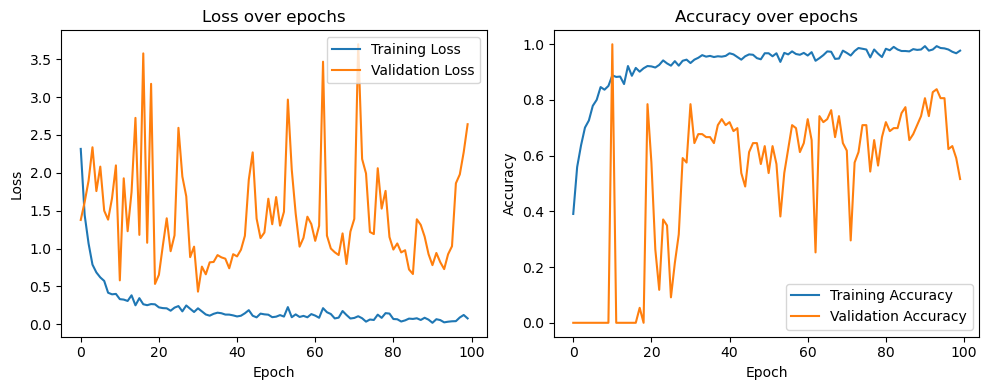

In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

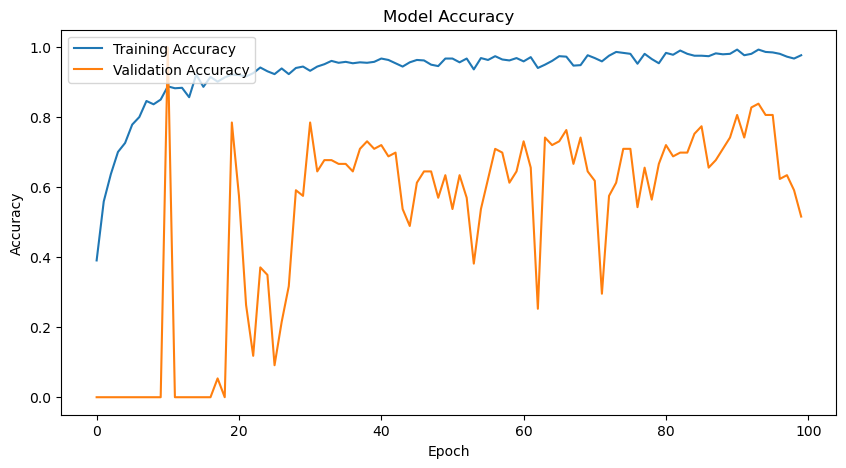

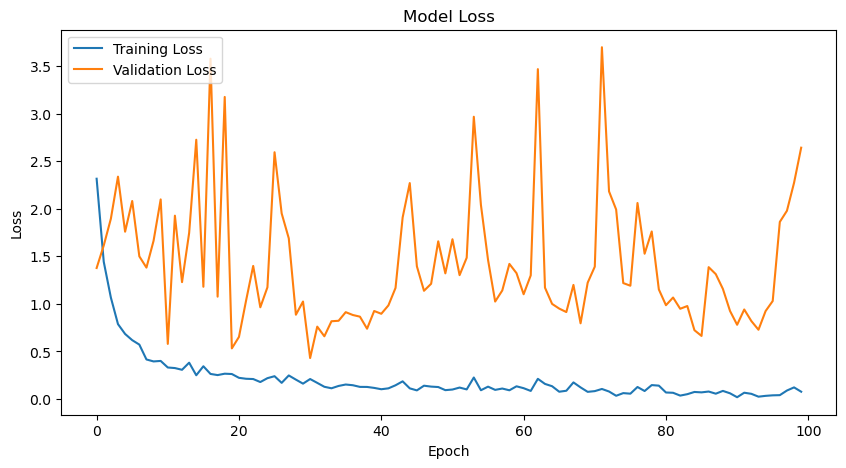

In [ ]:
import matplotlib.pyplot as plt

# Vẽ độ chính xác
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Vẽ giá trị mất mát
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Xây dựng mô hình 2DCNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # Giả sử kích thước đầu vào là 224x224x3
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),  # Sử dụng Dropout để giảm overfitting
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # Giả sử có 4 lớp đầu ra
])

# Cấu hình mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra tóm tắt mô hình
model.summary()


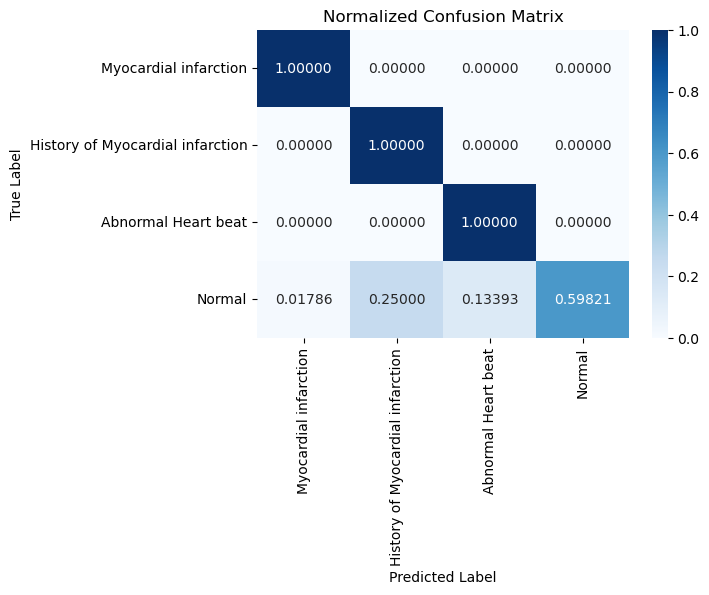

In [ ]:
class_labels = ['Myocardial infarction', 'History of Myocardial infarction', 'Abnormal Heart beat', 'Normal']

y_true = np.argmax(label_test, axis=1) # Chuyển one-hot encoding về dạng số nguyên
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1)


# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Chuẩn hóa confusion matrix
normalized_cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Vẽ heatmap cho confusion matrix đã chuẩn hóa
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap="Blues", fmt=".5f", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data
np.random.seed(1234)
path = 'train'
img_list = os.listdir(path)
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

for cat in img_list:
    pic_list = os.path.join(path, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append(image)
        label.append(label_dict[cat])

# Convert lists to arrays
data = np.array(data)
label = np.array(label)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=1234)

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# Load test data
path_test = 'test'
img_list_test = os.listdir(path_test)
data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data_test.append(image)
        label_test.append(label_dict[cat])

# Convert lists to arrays
data_test = np.array(data_test)
label_test = np.array(label_test)

# Normalize pixel values
data_test = data_test.astype('float32') / 255

# Evaluate the model on test data
loss, acc = model.evaluate(data_test, label_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# Generate predictions
y_pred = np.argmax(model.predict(data_test), axis=-1)

# Generate classification report
report = classification_report(label_test, y_pred, target_names=label_dict.keys(), digits=5)
print(report)


# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


class_labels = ['Myocardial infarction', 'History of Myocardial infarction', 'Abnormal Heart beat', 'Normal']

y_true = np.argmax(label_test, axis=1) # Chuyển one-hot encoding về dạng số nguyên
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1)


# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Chuẩn hóa confusion matrix
normalized_cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Vẽ heatmap cho confusion matrix đã chuẩn hóa
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap="Blues", fmt=".5f", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

2024-03-12 15:26:47.749258: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 446767104 exceeds 10% of free system memory.


Epoch 1/100
47/47 [==============================] - 127s 2s/step - loss: 1.3949 - accuracy: 0.2763 - val_loss: 1.3647 - val_accuracy: 0.2634
Epoch 2/100
47/47 [==============================] - 94s 2s/step - loss: 1.3745 - accuracy: 0.2978 - val_loss: 1.3521 - val_accuracy: 0.3011
Epoch 3/100
47/47 [==============================] - 100s 2s/step - loss: 1.3542 - accuracy: 0.3477 - val_loss: 1.3175 - val_accuracy: 0.3602
Epoch 4/100
47/47 [==============================] - 113s 2s/step - loss: 1.3017 - accuracy: 0.3854 - val_loss: 1.1546 - val_accuracy: 0.5000
Epoch 5/100
47/47 [==============================] - 90s 2s/step - loss: 1.0535 - accuracy: 0.5674 - val_loss: 0.9048 - val_accuracy: 0.6882
Epoch 6/100
47/47 [==============================] - 84s 2s/step - loss: 0.9130 - accuracy: 0.6442 - val_loss: 0.9137 - val_accuracy: 0.6075
Epoch 7/100
47/47 [==============================] - 97s 2s/step - loss: 0.7481 - accuracy: 0.6995 - val_loss: 0.6766 - val_accuracy: 0.7849
Epoch 8/10

KeyboardInterrupt: 

In [14]:
import os
import numpy as np
import cv2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data loading and preprocessing is done here, resulting in data, label arrays
# Load data
np.random.seed(1234)
path = 'train'
img_list = os.listdir(path)
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

for cat in img_list:
    pic_list = os.path.join(path, cat)
    for img in os.listdir(pic_list):
        image = cv2.imread(os.path.join(pic_list, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append(image)
        label.append(label_dict[cat])

# Convert lists to arrays
data = np.array(data)
label = np.array(label)

# Convert labels to categorical (one-hot encoding)
label = to_categorical(label)

# Initialize metrics dictionary
metrics = {'AUC': [], 'ACC': [], 'MCC': [], 'Confusion_Matrix': []}

# Setup 10-fold stratified cross-validation
kfolds = 10
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=1234)

# Directory for saving confusion matrices
os.makedirs('confusion_matrices', exist_ok=True)

for i, (train, test) in enumerate(kfold.split(data, np.argmax(label, axis=1)), start=1):
    # Build the model (same as before)
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model on the fold
    history = model.fit(data[train], label[train], epochs=100, batch_size=16, verbose=0)

    # Evaluate the model on the fold's test set
    predictions = model.predict(data[test])
    y_true = np.argmax(label[test], axis=1)
    y_pred = np.argmax(predictions, axis=1)
    
    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    auc = roc_auc_score(to_categorical(y_true), predictions, multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    # Store metrics
    metrics['AUC'].append(auc)
    metrics['ACC'].append(acc)
    metrics['MCC'].append(mcc)
    metrics['Confusion_Matrix'].append(cm)
    
    # Compute and print classification report
    report = classification_report(y_true, y_pred, digits=5)
    print(f"Classification Report for Fold {i}:\n{report}")
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {i}')
    
    # Save confusion matrix as image
    plt.savefig(f'confusion_matrices/conf_matrix_fold_{i}.png')
    plt.close()

    # Append metrics and report to file (example for appending classification report)
    with open(f'model_evaluation_fold_{i}.txt', 'w') as f:
        f.write(f"Classification Report for Fold {i}:\n{report}\n")


# Calculate means (and other statistics, as needed) of metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
std_metrics = {metric: np.std(values) for metric, values in metrics.items()}

# Save results to a .txt file
with open('model_evaluation.txt', 'w') as f:
    for metric, values in metrics.items():
        f.write(f"{metric} per fold: {values}\n")
    f.write("\nAverage metrics:\n")
    for metric, value in avg_metrics.items():
        f.write(f"{metric}: {value}\n")
    for metric, value in std_metrics.items():
        f.write(f"{metric} Std: {value}\n")


3/3 [==============================] - 3s 812ms/step
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        24
           1    0.94444   1.00000   0.97143        17
           2    1.00000   0.95833   0.97872        24
           3    1.00000   1.00000   1.00000        28

    accuracy                        0.98925        93
   macro avg    0.98611   0.98958   0.98754        93
weighted avg    0.98984   0.98925   0.98929        93

3/3 [==============================] - 4s 845ms/step
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        24
           1    1.00000   1.00000   1.00000        17
           2    1.00000   0.91667   0.95652        24
           3    0.93333   1.00000   0.96552        28

    accuracy                        0.97849        93
   macro avg    0.98333   0.97917   0.98051        93
weighted av

KeyboardInterrupt: 

In [ ]:
model.save("2DECG.h5")

NameError: name 'history' is not defined

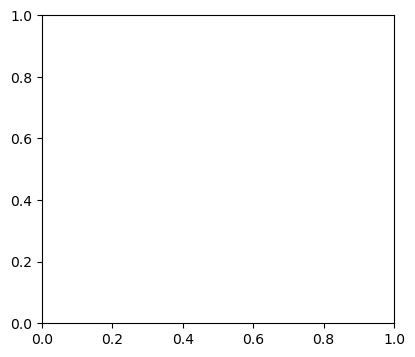

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
class_labels = ['Myocardial infarction', 'History of Myocardial infarction', 'Abnormal Heart beat', 'Normal']

y_true = np.argmax(label_test, axis=1) # Chuyển one-hot encoding về dạng số nguyên
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1)


# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Chuẩn hóa confusion matrix
normalized_cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Vẽ heatmap cho confusion matrix đã chuẩn hóa
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap="Blues", fmt=".5f", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'np' is not defined